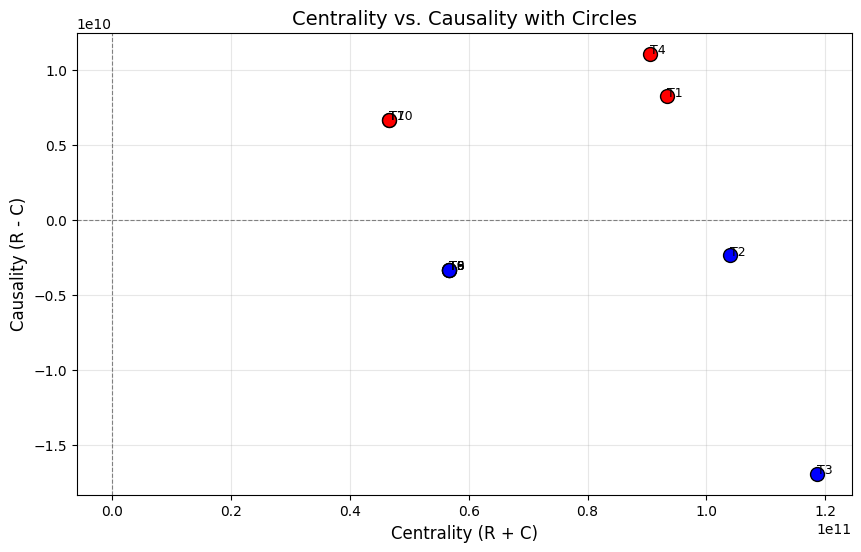

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Direct Influence Matrix
direct_influence_matrix = np.array([
    [0, 2, 3, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 2, 1, 0, 0, 0, 0, 0, 0],
    [2, 3, 0, 2, 0, 0, 0, 0, 0, 0],
    [1, 1, 2, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 2, 1, 0, 0, 0],
    [0, 0, 0, 0, 2, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 2, 1],
    [0, 0, 0, 0, 0, 0, 0, 2, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
])

# Normalize the Direct Influence Matrix
row_sums = direct_influence_matrix.sum(axis=1, keepdims=True)
normalized_matrix = direct_influence_matrix / (row_sums + 1e-10)

# Comprehensive Influence Matrix
identity_matrix = np.eye(len(direct_influence_matrix))
comprehensive_matrix = np.linalg.inv(identity_matrix - normalized_matrix)

# Calculate Centrality (R + C) and Causality (R - C)
row_sum = comprehensive_matrix.sum(axis=1)
column_sum = comprehensive_matrix.sum(axis=0)
centrality = row_sum + column_sum
causality = row_sum - column_sum

# Plot the Centrality vs. Causality scatter plot
plt.figure(figsize=(10, 6))
for i, (x, y) in enumerate(zip(centrality, causality)):
    color = 'red' if y > 0 else 'blue'
    plt.scatter(x, y, color=color, s=100, edgecolor='black', label=f'Factor {i+1}' if i < 1 else "")
    plt.text(x + 0.05, y + 0.05, f"T{i+1}", fontsize=9)

# Add labels and legend
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title("Centrality vs. Causality with Circles", fontsize=14)
plt.xlabel("Centrality (R + C)", fontsize=12)
plt.ylabel("Causality (R - C)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()


